In [48]:
import csv 
import matplotlib.pyplot as plt 
import altair 
import pandas as pd

data = pd.read_csv('/Users/deekshitamadhalam/Downloads/updated_dataset.csv')
data

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,B67
1,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,SIM33C
2,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,B8
3,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,BM4
4,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,Q46
...,...,...,...,...,...,...,...,...
193757,Subways,Complaint,Station /Bus Stop /Facility /Structure,Track / Right-of-Way,Track / Right-of-Way,2014,1,No Value
193758,Subways,Complaint,Station /Bus Stop /Facility /Structure,Ticket Machines,Not Working / Out of Service,2014,1,No Value
193759,Subways,Complaint,Station /Bus Stop /Facility /Structure,Station - General,Litter / Garbage / Debris,2014,1,No Value
193760,Subways,Complaint,Station /Bus Stop /Facility /Structure,Staircase,Snow / Ice,2014,1,No Value


In [49]:
import plotly.express as px

In [50]:
year = {}
for value in data['Year']:
    if value in year:
        year[value] += 1 
    else:
        year[value] = 1

print(year)    

{2019: 37029, 2018: 36726, 2017: 34881, 2016: 35936, 2015: 33130, 2014: 16060}


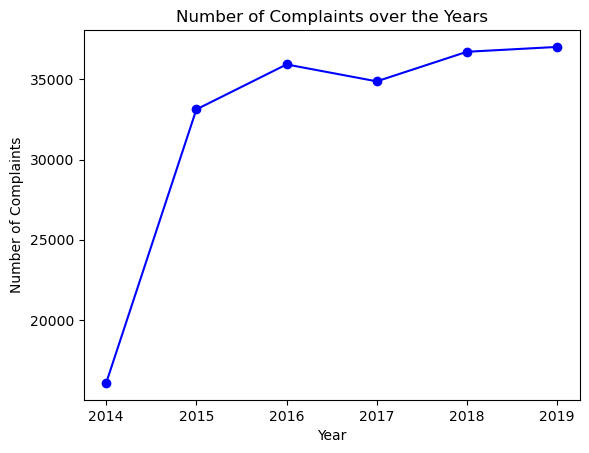

In [51]:
years = list(year.keys())
values = list(year.values())

plt.plot(years, values, marker='o', linestyle='-', color='blue')
plt.xlabel("Year")
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints over the Years')
plt.show()

In [52]:
df_complaints = data[data['Commendation or Complaint'] == 'Complaint']

subject_matter_complaints = df_complaints.groupby(['Year', 'Issue Detail']).size().unstack()

new_subject_matter_complaints = subject_matter_complaints[subject_matter_complaints > 500]

In [53]:
import pandas as pd
import altair as alt



# Reshape the data for Altair (long format)
new_format = new_subject_matter_complaints.reset_index().melt(id_vars='Year', var_name='Issue Detail', value_name='Complaints')

# Create the Altair line chart
chart = alt.Chart(new_format).mark_line().encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Complaints:Q', title='Number of Complaints'),
    color=alt.Color('Issue Detail:N', title='Issue Detail'),
    tooltip=['Year', 'Issue Detail', 'Complaints']
).properties(
    title='Complaints Overview by Year',
        width=800,
        height=400
).interactive()


In [54]:
filter = alt.binding_radio(options = ['Other', 'Rude / Inappropriate Language','Improper Function/Needs Repair/Damaged',
                                      'Late / Delay', 'Flagging / Failed To Stop', 'Failure To Make Scheduled Stop', 'Reckless Driving', 
                                       'Not Helpful', 'Closed Door Before Customer Could Board', 'Crowding', 'Not regulating service properly',
                                       'Add More / Not Enough', 'Early', 'No Announcement / Messages - Audio', 'Litter / Garbage / Debris', None],

                                       labels = ['Other', 'Rude / Inappropriate Language','Improper Function/Needs Repair/Damaged',
                                      'Late / Delay', 'Flagging / Failed To Stop', 'Failure To Make Scheduled Stop', 'Reckless Driving', 
                                       'Not Helpful', 'Closed Door Before Customer Could Board', 'Crowding', 'Not regulating service properly',
                                       'Add More / Not Enough', 'Early', 'No announcement / Messages - Audio', 'Litter / Garbage / Debris', 'All'],
                                       
                                       name = "Issue Detail: ")

filter_selection = alt.selection_point(fields = ['Issue Detail'], bind = filter)

chart = chart.add_params(
    filter_selection
).transform_filter(
    filter_selection
).interactive()

chart


alt.Chart(...)

In [55]:
chart.save('altair_plot.html')
